<a href="https://colab.research.google.com/github/Sayed-Hossein-Hosseini/SVM_MNIST_Classifier/blob/master/SVM_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVM MNIST Classifier**

## **Libraries**

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## **Load MNIST Data**

In [2]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **Flatten the Images**

In [3]:
# Flatten the images
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

## **Hyperparameters**

In [4]:
# Hyperparameters
batch_size = 1000
C = 1.0

## **Linear Kernel**

In [5]:
# Linear kernel
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

## **SVM Train for Binary Classification**

In [6]:
# SVM train for binary classification
def svm_train(X, y, C=1.0):
    n_samples, n_features = X.shape
    K = np.dot(X, X.T)

    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y.astype('double'), (1, n_samples))
    b = matrix(0.0)

    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.ravel(sol['x'])

    sv = alphas > 1e-5
    alphas = alphas[sv]
    sv_X = X[sv]
    sv_y = y[sv]

    b = np.mean(sv_y - np.dot(sv_X, np.dot(sv_X.T, alphas * sv_y)))
    w = np.dot((alphas * sv_y), sv_X)

    return w, b

## **Predict**

In [7]:
# Predict
def svm_predict(X, w, b):
    return np.dot(X, w) + b

## **One-vs-Rest Training with Batch Training**

In [8]:
# One-vs-Rest training with batch training
classifiers = []

for digit in range(10):
    print(f"\nTraining SVM for digit {digit} in batches...")
    w_final, b_final = None, None

    # Process in batches
    for start in range(0, X_train.shape[0], batch_size):
        end = start + batch_size
        X_batch = X_train[start:end]
        y_batch = y_train[start:end]

        y_batch_binary = np.where(y_batch == digit, 1, -1)

        print(f"  Batch {start} to {end} ...", end=" ", flush=True)

        try:
            w, b = svm_train(X_batch, y_batch_binary, C=C)
            w_final, b_final = w, b
            print("OK")
        except Exception as e:
            print(f"Failed: {e}")
            continue

    classifiers.append((w_final, b_final))

Streaming output truncated to the last 5000 lines.
10: -4.5690e+00 -4.5695e+00  5e-04  3e-16  2e-14
11: -4.5692e+00 -4.5692e+00  6e-06  3e-16  2e-14
12: -4.5692e+00 -4.5692e+00  6e-08  2e-16  2e-14
Optimal solution found.
OK
  Batch 31000 to 32000 ...      pcost       dcost       gap    pres   dres
 0: -8.0270e+01 -1.6955e+03  8e+03  2e+00  2e-13
 1: -5.1575e+01 -8.9356e+02  2e+03  4e-01  2e-13
 2: -2.5138e+01 -3.4105e+02  6e+02  1e-01  1e-13
 3: -1.3002e+01 -1.2467e+02  2e+02  3e-02  7e-14
 4: -6.3743e+00 -4.2164e+01  6e+01  8e-03  4e-14
 5: -4.4414e+00 -1.4607e+01  1e+01  2e-03  2e-14
 6: -4.8230e+00 -8.0676e+00  4e+00  4e-04  2e-14
 7: -5.0701e+00 -5.9646e+00  9e-01  2e-16  3e-14
 8: -5.3248e+00 -5.5353e+00  2e-01  3e-16  2e-14
 9: -5.3983e+00 -5.4160e+00  2e-02  2e-16  2e-14
10: -5.4059e+00 -5.4063e+00  4e-04  4e-16  2e-14
11: -5.4061e+00 -5.4061e+00  8e-06  5e-16  2e-14
12: -5.4061e+00 -5.4061e+00  1e-07  2e-16  3e-14
Optimal solution found.
OK
  Batch 32000 to 33000 ...      pcos

## **Predict on Test Data**

In [9]:
# Predict on test data
predictions = []

for i in range(len(X_test)):
    scores = []
    for w, b in classifiers:
        score = svm_predict(X_test[i], w, b)
        scores.append(score)
    pred = np.argmax(scores)
    predictions.append(pred)

## **Accuracy**

In [10]:
# Test accuracy
accuracy = np.mean(np.array(predictions) == y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 78.68%


## **Confusion Matrix**

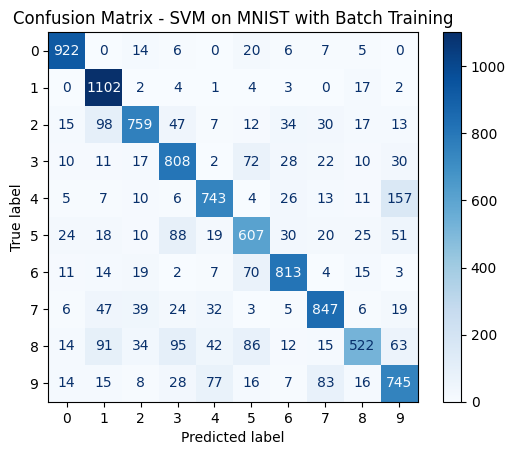

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM on MNIST with Batch Training")
plt.show()

## **THE END**